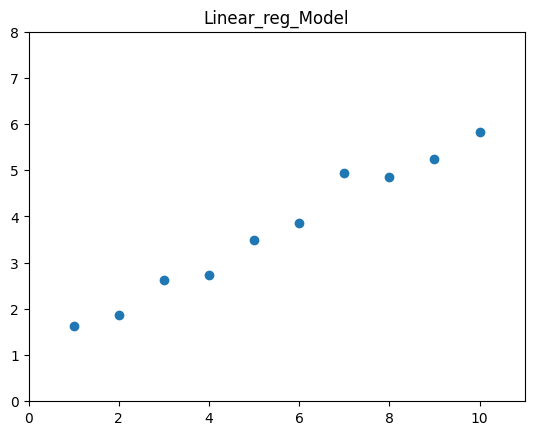

In [36]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch import nn

# CSV 파일 읽기
data = pd.read_csv('data/02_Linear_Regression_Model_Data.csv')

# 데이터를 PyTorch 텐서로 변환
x = torch.from_numpy(data['x'].values).unsqueeze(dim=1).float()
y = torch.from_numpy(data['y'].values).unsqueeze(dim=1).float()

# 데이터 플로팅
plt.xlim(0, 11)
plt.ylim(0, 8)
plt.title("Linear_reg_Model")
plt.scatter(x, y)
plt.show()


In [39]:

model = nn.Linear(in_features=1, out_features=1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

for step in range(500):
    pred = model(x)
    loss = criterion(input=pred, target=y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 20 == 0:
        print(f"Step {step}, Loss: {loss.item()}")

Step 0, Loss: 24.09152603149414
Step 20, Loss: 0.4458627700805664
Step 40, Loss: 0.3830784261226654
Step 60, Loss: 0.3300212621688843
Step 80, Loss: 0.28518423438072205
Step 100, Loss: 0.24729368090629578
Step 120, Loss: 0.21527354419231415
Step 140, Loss: 0.18821431696414948
Step 160, Loss: 0.16534732282161713
Step 180, Loss: 0.14602313935756683
Step 200, Loss: 0.1296927034854889
Step 220, Loss: 0.11589246988296509
Step 240, Loss: 0.10423028469085693
Step 260, Loss: 0.09437492489814758
Step 280, Loss: 0.08604641258716583
Step 300, Loss: 0.07900829613208771
Step 320, Loss: 0.073060542345047
Step 340, Loss: 0.06803429126739502
Step 360, Loss: 0.06378675997257233
Step 380, Loss: 0.060197241604328156
Step 400, Loss: 0.057163894176483154
Step 420, Loss: 0.05460049584507942
Step 440, Loss: 0.05243424326181412
Step 460, Loss: 0.050603579729795456
Step 480, Loss: 0.04905655235052109


In [28]:
print(x.shape, y.shape)

torch.Size([10, 1]) torch.Size([10, 1])


In [29]:
# practice 2
import sklearn.datasets
diabets = sklearn.datasets.load_diabetes()
x = torch.from_numpy(diabets['data'])
y = torch.from_numpy(diabets['target'])

print(x.shape, y.shape)

torch.Size([442, 10]) torch.Size([442])


In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import sklearn.datasets

# 당뇨병 데이터셋 로드
diabetes = sklearn.datasets.load_diabetes()
x = torch.from_numpy(diabetes['data']).float()
y = torch.from_numpy(diabetes['target']).float().view(-1, 1)

# 모델 정의
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(x.size(1), 5)
        self.linear2 = nn.Linear(5, 1)
        
    def forward(self, x):
        x_temp = self.linear1(x)
        x_temp2 = self.linear2(x_temp)
        return x_temp2

model = CustomModel()

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 훈련
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    predictions = model(x)
    
    # Loss 계산
    loss = criterion(predictions, y)
    
    # Backward pass 및 가중치 업데이트
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 매 100번째 epoch마다 loss 출력
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: nan
Epoch [200/1000], Loss: nan
Epoch [300/1000], Loss: nan
Epoch [400/1000], Loss: nan
Epoch [500/1000], Loss: nan
Epoch [600/1000], Loss: nan
Epoch [700/1000], Loss: nan
Epoch [800/1000], Loss: nan
Epoch [900/1000], Loss: nan
Epoch [1000/1000], Loss: nan


In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
import sklearn.datasets

# 당뇨병 데이터셋 로드
diabetes = sklearn.datasets.load_diabetes()
x = torch.from_numpy(diabetes['data']).float()
y = torch.from_numpy(diabetes['target']).float().view(-1, 1)

# 모델 정의
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(x.size(1), 5)
        self.act = nn.ReLU()
        self.linear2 = nn.Linear(5, 1)
        
    def forward(self, x):
        x_temp = self.linear1(x)
        x_temp2 = self.act(x_temp)
        x_temp3 = self.linear2(x_temp2)
        return x_temp3

model = CustomModel()

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 훈련
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    predictions = model(x)
    
    # Loss 계산
    loss = criterion(predictions, y)
    
    # Backward pass 및 가중치 업데이트
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 매 100번째 epoch마다 loss 출력
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 6396.1455
Epoch [200/1000], Loss: 5938.0854
Epoch [300/1000], Loss: 5930.0293
Epoch [400/1000], Loss: 5929.8872
Epoch [500/1000], Loss: 5929.8853
Epoch [600/1000], Loss: 5929.8848
Epoch [700/1000], Loss: 5929.8853
Epoch [800/1000], Loss: 5929.8853
Epoch [900/1000], Loss: 5929.8853
Epoch [1000/1000], Loss: 5929.8853


In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import sklearn.datasets

# 당뇨병 데이터셋 로드
diabetes = sklearn.datasets.load_diabetes()
x = torch.from_numpy(diabetes['data']).float()
y = torch.from_numpy(diabetes['target']).float().view(-1, 1)

# 모델 정의
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(x.size(1), 1)
        
    def forward(self, x):
        return self.linear(x)

model = CustomModel()

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 훈련
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    predictions = model(x)
    
    # Loss 계산
    loss = criterion(predictions, y)
    
    # Backward pass 및 가중치 업데이트
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 매 100번째 epoch마다 loss 출력
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 6273.7715
Epoch [200/1000], Loss: 5783.8960
Epoch [300/1000], Loss: 5704.4175
Epoch [400/1000], Loss: 5634.4014
Epoch [500/1000], Loss: 5566.7236
Epoch [600/1000], Loss: 5501.1797
Epoch [700/1000], Loss: 5437.6958
Epoch [800/1000], Loss: 5376.2026
Epoch [900/1000], Loss: 5316.6284
Epoch [1000/1000], Loss: 5258.9092
